In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('data/insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


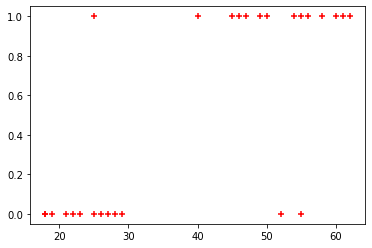

In [3]:
plt.scatter(df['age'],df['bought_insurance'],color='red',marker='+')

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['age']],df['bought_insurance'],test_size=0.2)
x_train

,age
9,61
8,62
3,52
18,19
10,18
21,26
23,45
11,28
0,22
6,55


In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [9]:
3model.predict(x_test)

array([0, 1, 1, 1, 1, 0], dtype=int64)

In [10]:
y_test

1     0
25    1
24    1
2     1
14    1
19    0
Name: bought_insurance, dtype: int64

In [11]:
model.score(x_test,y_test)

1.0

# Solving Practice Problem

In [38]:
df=pd.read_csv('data/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## One Hot Encoding 

In [39]:
df['salary']=df['salary'].replace({'low':0,'medium':1,'high':2}) # Setting values for ordinal categorical varialbe
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0
14995,0.37,0.48,2,160,3,0,1,0,support,0
14996,0.37,0.53,2,143,3,0,1,0,support,0
14997,0.11,0.96,6,280,4,0,1,0,support,0


**Department wise employee retention rate**

<AxesSubplot:xlabel='Department'>

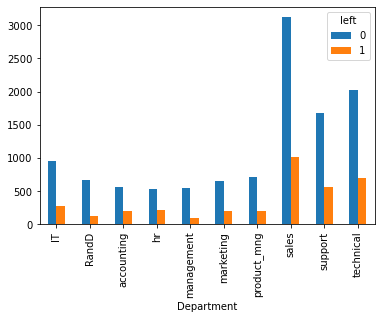

In [46]:
pd.crosstab(df['Department'],df['left']).plot(kind='bar')

**From above chart there seem to be some impact of department on employee retention but for the simplicity let's remove this nominal categorical variable**

In [47]:
final_df=df.drop('Department',axis=1) # Removing the nominal categorical variable for simplicity
final_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1
2,0.11,0.88,7,272,4,0,1,0,1
3,0.72,0.87,5,223,5,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(final_df.drop('left',axis=1),final_df['left'],test_size=0.2)

In [36]:
model=LogisticRegression(max_iter=1000000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000000)

In [37]:
model.score(x_test,y_test)

0.792